# IPL Matches Descriptive Data Analysis

Hello this analysis is based upon data of 2008-2019. I am just analysing what has happened in the last 12 sessions.

In [58]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Data Preparation and Cleaning

In [59]:
ipl_df = pd.read_csv('Dataset/matches.csv')
ipl_df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [60]:
ipl_df.shape

(756, 18)

In [61]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

We see that in the umpire3 column, we have only 119 non-null objects. So we can discard them without any issue. Also, we will discard the umpire1 and umpire2 columns since they won't be useful in our data analysis.

In [62]:
deliveries_df = pd.read_csv('Dataset/deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [63]:
deliveries_df.shape

(179078, 21)

In [64]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [65]:
# for ipl_df dataframe
discard_columns = ['umpire1','umpire2','umpire3']

ipl_df = ipl_df.drop(discard_columns, axis=1)

ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [66]:
ipl_df.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [67]:
ipl_df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

# Exploratory Analysis and Visualization

In [68]:
ipl_df.sample(10)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
244,245,IPL-2011,Hyderabad,14-04-2011,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,33,0,DW Steyn,"Rajiv Gandhi International Stadium, Uppal"
44,45,IPL-2017,Bangalore,07-05-2017,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium
509,510,IPL-2014,Bangalore,24-05-2014,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,MS Dhoni,M Chinnaswamy Stadium
732,11328,IPL-2019,Delhi,20-04-2019,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,SS Iyer,Feroz Shah Kotla Ground
80,81,IPL-2008,Chandigarh,03-05-2008,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali"
677,7935,IPL-2018,Delhi,10-05-2018,Delhi Daredevils,Sunrisers Hyderabad,Delhi Daredevils,bat,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,Feroz Shah Kotla
482,483,IPL-2014,Delhi,05-05-2014,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,DR Smith,Feroz Shah Kotla
109,110,IPL-2008,Chennai,24-05-2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk"
663,7921,IPL-2018,Jaipur,29-04-2018,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,11,0,KS Williamson,Sawai Mansingh Stadium
669,7927,IPL-2018,Indore,04-05-2018,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,AS Yadav,Holkar Cricket Stadium


In [69]:
city_host = ipl_df.city.value_counts()
city_host

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Ranchi              7
Cape Town           7
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


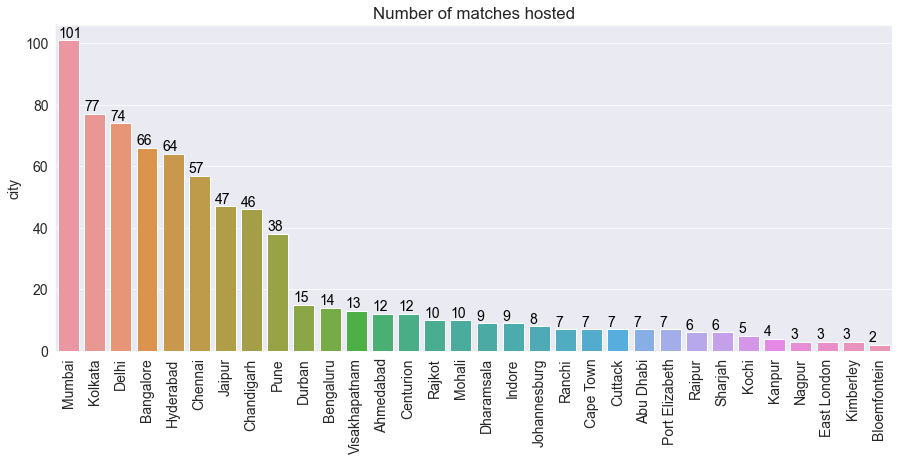

In [70]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Number of matches hosted')
count=0
cities=pd.DataFrame(city_host)
cities['name']=city_host.index
for i in cities['city']:
    plt.text(count-0.4,i+1,str(i),color='black')
    count+=1
sns.barplot(city_host.index, city_host);

# Maximum Runs Scored By Different Players In An Inning


In [71]:
batting_ings = deliveries_df.groupby(['match_id','batsman']).apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
sorted_batting_ings = batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores = sorted_batting_ings[:10] 
ball_faced = deliveries_df.groupby(['match_id','batsman']).apply(lambda x : x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance = pd.merge(top_batsmen_scores, ball_faced, how='inner', left_on=['match_id','batsman'], right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match'] = batsmen_performance['Innings Runs']*100 / batsmen_performance['Balls Faced']
batsmen_innings = pd.merge(batsmen_performance, deliveries_df, how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_table = batsmen_innings.iloc[:,1:8]
batsmen_innings_table2 = batsmen_innings_table.drop_duplicates()
batsmen_innings_table2

,batsman,Innings Runs,Balls Faced,Strike Rate for Match,inning,batting_team,bowling_team
0,CH Gayle,175,69,253.623188,1,Royal Challengers Bangalore,Pune Warriors
69,BB McCullum,158,77,205.194805,1,Kolkata Knight Riders,Royal Challengers Bangalore
146,AB de Villiers,133,61,218.032787,1,Royal Challengers Bangalore,Mumbai Indians
207,RR Pant,130,64,203.125000,1,Delhi Daredevils,Sunrisers Hyderabad
271,AB de Villiers,129,53,243.396226,1,Royal Challengers Bangalore,Gujarat Lions
324,CH Gayle,128,62,206.451613,1,Royal Challengers Bangalore,Delhi Daredevils
386,M Vijay,127,57,222.807018,1,Chennai Super Kings,Rajasthan Royals
443,DA Warner,126,60,210.000000,1,Sunrisers Hyderabad,Kolkata Knight Riders
503,V Sehwag,122,62,196.774194,1,Kings XI Punjab,Chennai Super Kings
565,SR Watson,121,60,201.666667,2,Chennai Super Kings,Sunrisers Hyderabad


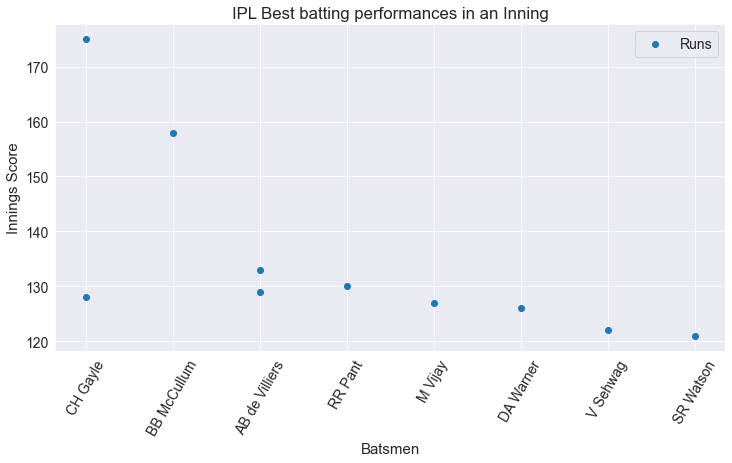

In [72]:
x=batsmen_innings_table2['batsman']
y1=batsmen_innings_table2['Innings Runs']
plt.figure(figsize=(12,6))
plt.scatter(x,y1)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Innings Score',size=15)
plt.title('IPL Best batting performances in an Inning')
plt.xticks(rotation=60)
plt.legend(['Runs']);

We can see that Chris Gayle is the one who has scored the maximum runs(175*) in a match followed by Brendon McCullum and AB de Villiers.

Well, if you are an IPL fan, you must have been aware of this Gayle Storm that hit the Chinnaswamy Stadium on April 23,2013. Gayle scored an unbeaten 175 against Pune Warriors with 17 sixes and 13 fours in just 66 balls and a strike rate of 265.15 . Isn't that something the Universe Boss can only do??

In the above graph, we can see two players, Chris Gayle and AB de Villers, have appeared twice and they both play for Royal Challengers Bangalore. But there's a fun fact, despite having world class players like Gayle, Kohli and ABD , RCB has never won any season of IPL.

# Maximum Wickets taken by bowlers in last 12 seasons


In [73]:
bowling_wickets = deliveries_df[deliveries_df['dismissal_kind']!='run out']
bowling_total = bowling_wickets.groupby('bowler').apply(lambda x : x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wicket_count = bowling_total.groupby('bowler').count().reset_index()
bowling_top = bowling_wicket_count.sort_values(by='Wickets',ascending=False)
top_bowlers = bowling_top.loc[:,['bowler','Wickets']][0:10]
top_bowlers

,bowler,Wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,150
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


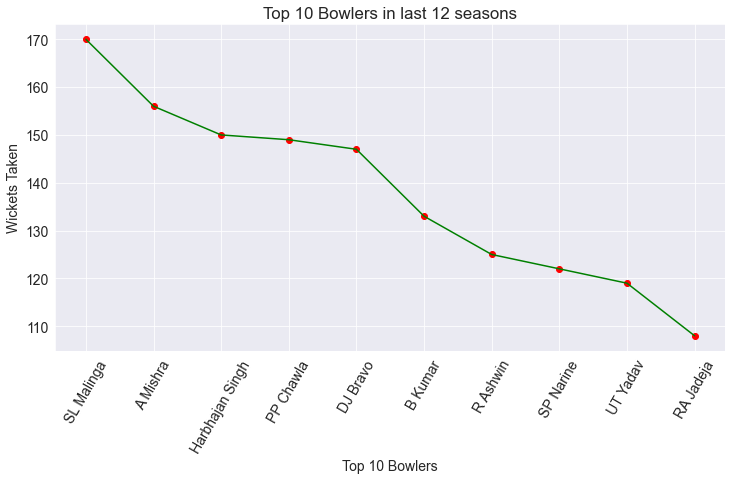

In [74]:
plt.figure(figsize=(12,6))
plt.scatter(top_bowlers['bowler'],top_bowlers['Wickets'],color='r');
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='g');
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowlers')
plt.ylabel('Wickets Taken')
plt.title('Top 10 Bowlers in last 12 seasons');

# Matches Played vs Matches Won

In [75]:
matches_played=pd.concat([ipl_df['team1'],ipl_df['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=ipl_df['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)

In [76]:
matches_played.reset_index()

,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,84
4,Chennai Super Kings,164,82
5,Delhi Daredevils,161,75
6,Rajasthan Royals,147,67
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,15


In [77]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Kings XI Punjab                47.7
Chennai Super Kings            50.0
Delhi Daredevils               46.6
Rajasthan Royals               45.6
Sunrisers Hyderabad            53.7
Deccan Chargers                38.7
Pune Warriors                  32.6
Rising Pune Supergiants        43.3
Gujarat Lions                  40.0
Delhi Capitals                 62.5
Kochi Tuskers Kerala           42.9
dtype: float64

C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


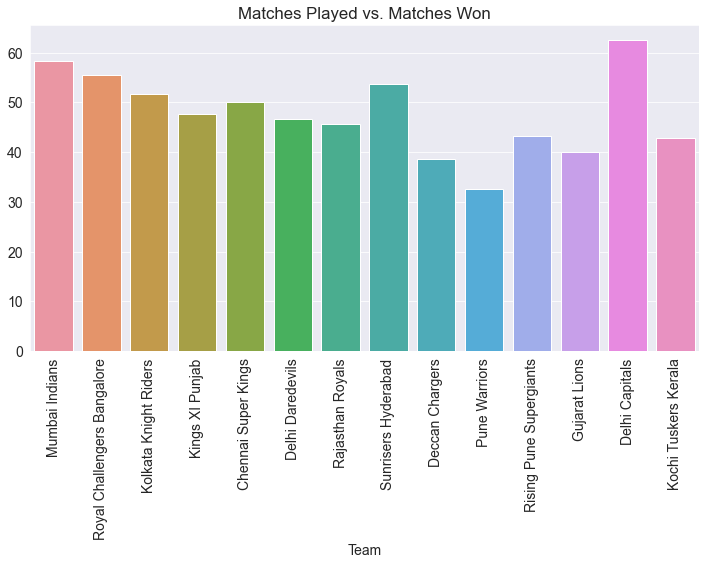

In [78]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Matches Played vs. Matches Won')
sns.barplot(matches_played['Total Matches'].index, win_percentage);

# Maximum Runs Scored By A Team


In [79]:
high_scores = deliveries_df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores = high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


# Biggest win by runs each season


In [80]:
season = ipl_df.Season.values
year = []
for i in range(len(season)):
    year.append(int(season[i][4:8]))
ipl_df['Year'] = year
ipl_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Year
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",2017
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2017
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,2017
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,2017
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,2019
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,2019
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,2019
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,2019


In [81]:
y = 2008
season=[]
win_by_runs_max=[]
while y<2020:
    season.append(y)
    win_by_runs_max.append(ipl_df[ipl_df['Year']==y]['win_by_runs'].max())
    y += 1
win_by_runs_max

[140, 92, 98, 111, 86, 130, 93, 138, 144, 146, 102, 118]

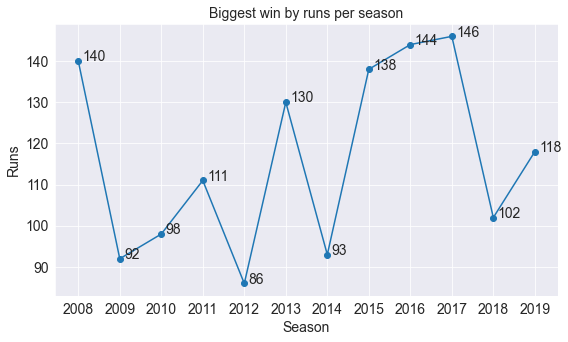

In [82]:
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count < 12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.xlabel('Season')
plt.ylabel('Runs')
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

# Asking and Answering Questions
Now, let us answer some basic questions that one might want to know about the IPL seasons.



# Q. Which team won the maximum number of matches in all seasons?

In [83]:
winner = ipl_df.winner.value_counts()
winner

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

We can see that Mumbai Indians have won the maximum number of matches in the last 12 seasons of IPL, followed by Chennai Super Kings and Kolkata Knight Riders. So, we may say that Mumbai Indians has been the most successful team in the IPL. We can also see that few teams like Kochi Tuskers Kerala, Delhi Capitals, Pune Warriors, etc. have won very less number of matches. The reason for this is they had played the IPL for just 1 or 2 seasons.

C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


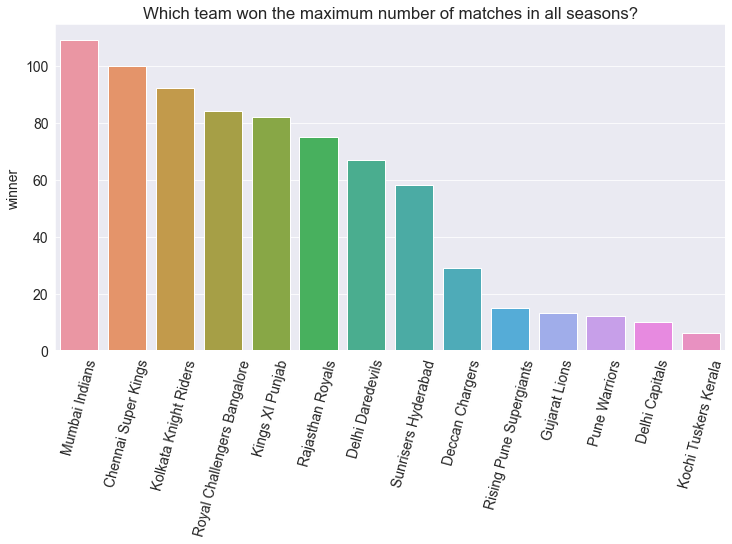

In [84]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Which team won the maximum number of matches in all seasons?')
sns.barplot(winner.index, winner);

# Q. Which player has become the Man of the Match most number of times?

In [85]:
m_o_m = ipl_df.player_of_match.value_counts()
m_o_m

CH Gayle           21
AB de Villiers     20
DA Warner          17
MS Dhoni           17
RG Sharma          17
                   ..
R Bhatia            1
GD McGrath          1
P Shaw              1
AA Jhunjhunwala     1
NV Ojha             1
Name: player_of_match, Length: 226, dtype: int64

C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


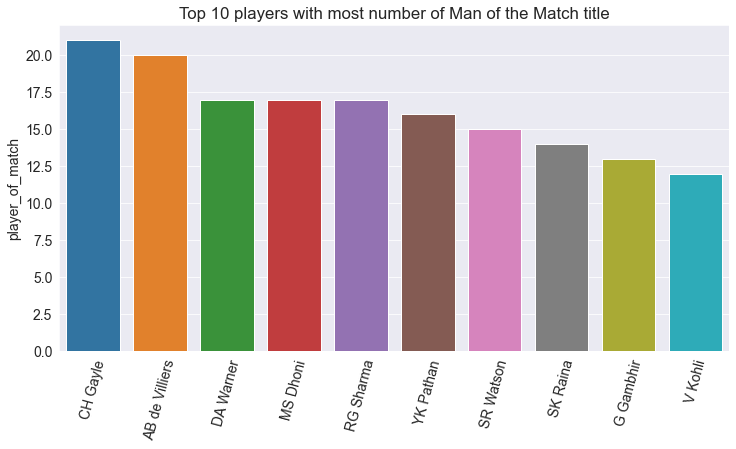

In [86]:
m_o_m_10 = m_o_m[:10]
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 players with most number of Man of the Match title')
sns.barplot(m_o_m_10.index, m_o_m_10);

# Q. Does winning the toss increase the chances of winning the match?

In [87]:
win = ipl_df.winner == ipl_df.toss_winner
win_counts = win.value_counts()
win_counts

True     393
False    363
dtype: int64

In [88]:
round((win_counts/win.count())*100,2)

True     51.98
False    48.02
dtype: float64

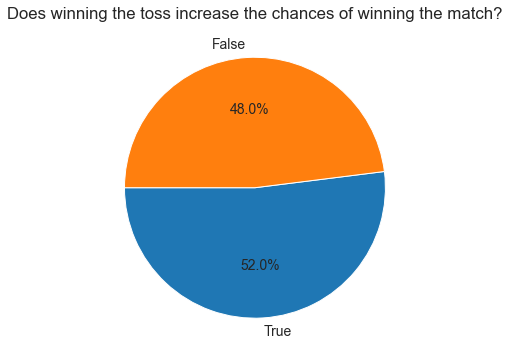

In [89]:
plt.figure(figsize=(12,6))
plt.title('Does winning the toss increase the chances of winning the match?')
plt.pie(win_counts,labels=win_counts.index,autopct='%1.1f%%', startangle=180);

# Q. Who are the Top 5 scoring batsmen?

In [90]:
batsmen = deliveries_df.groupby('batsman').apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsmen_sorted=batsmen.sort_values(by='Runs',ascending=False)
top_batsmen=batsmen_sorted[:5]
top_batsmen

,batsman,Runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632


C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


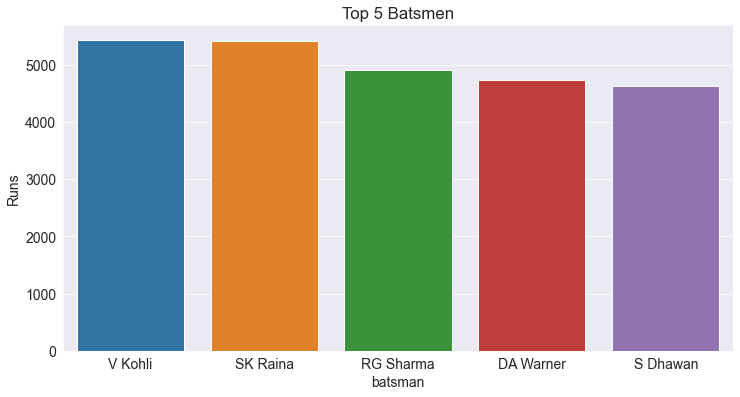

In [91]:
plt.figure(figsize=(12,6))
plt.title('Top 5 Batsmen')
sns.barplot(top_batsmen['batsman'],top_batsmen['Runs']);

# Q. What is the maximum run by which a team won?

In [92]:
batting_first_team = ipl_df[ipl_df.win_by_runs != 0]
batting_first_team.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Year
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",2017
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,2017
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,2017
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,2017
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,2017


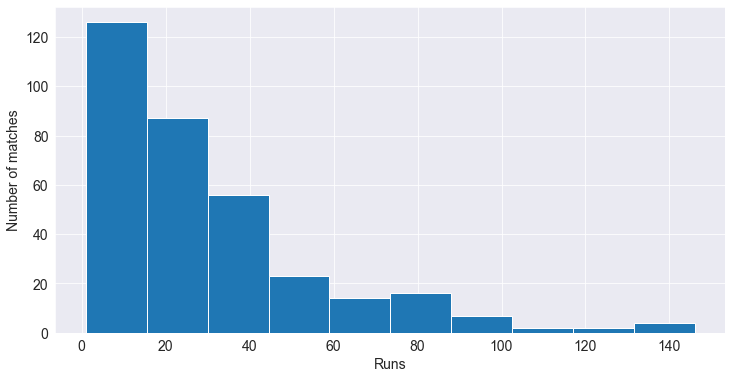

In [93]:
plt.figure(figsize=(12,6))
plt.hist(batting_first_team['win_by_runs'])
plt.xlabel('Runs')
plt.ylabel('Number of matches')
plt.show()

# What is the maximum wicket by a which a team won?

In [94]:
bowling_first_team = ipl_df[ipl_df.win_by_wickets != 0]
bowling_first_team.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Year
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2017
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,2017
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,2017
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",2017
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,2017


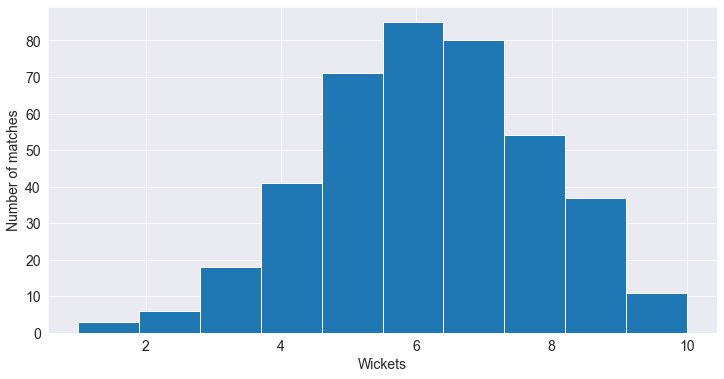

In [95]:
plt.figure(figsize=(12,6))
plt.hist(bowling_first_team['win_by_wickets'])
plt.xlabel('Wickets')
plt.ylabel('Number of matches')
plt.show()